In [1]:
# imports
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
# calibrate camera
objp = np.zeros((6*9,3), np.float32)
objp[:, :2] = np.mgrid[:9, :6].T.reshape(-1, 2)

objpoints = []
imgpoints = []

images = glob.glob('camera_cal/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)
    
    ret, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    if ret:
        p = {}
        p['cmtx'] = mtx
        p['dCoefs'] = dist
        pickle.dump(p, open('camera_cal/camera_params.p', 'wb'))
        

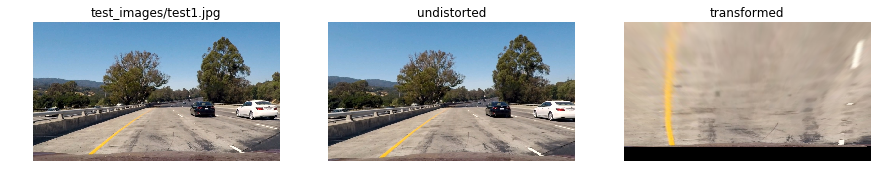

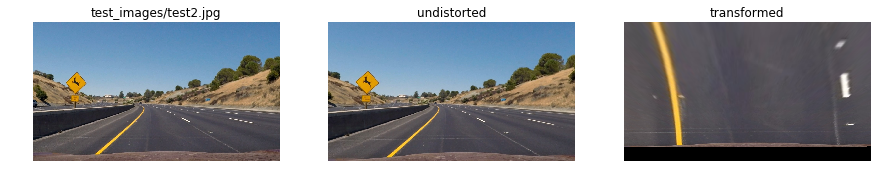

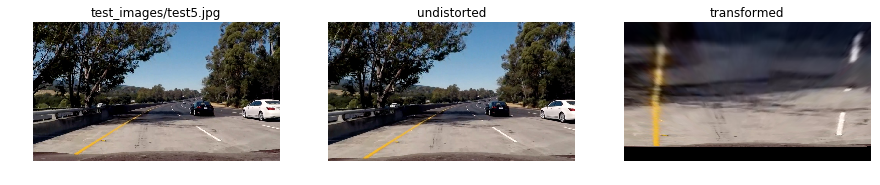

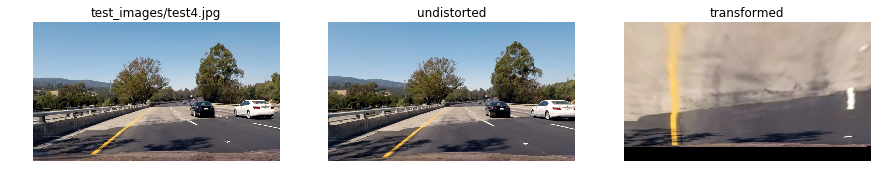

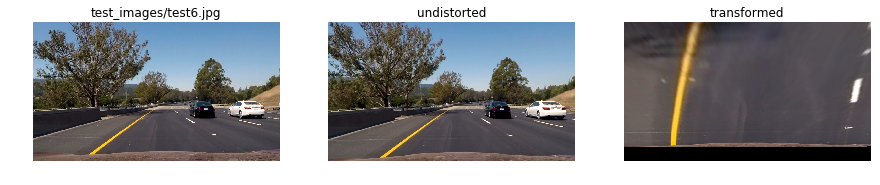

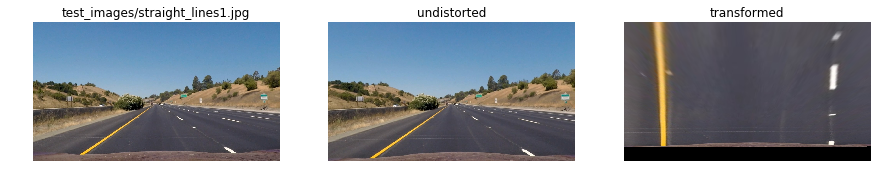

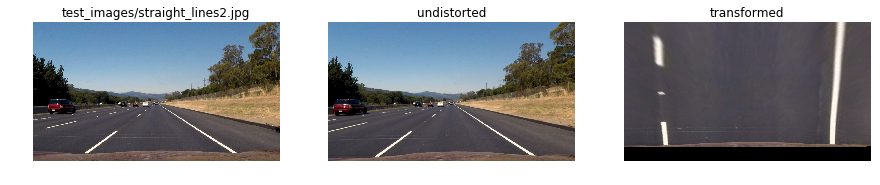

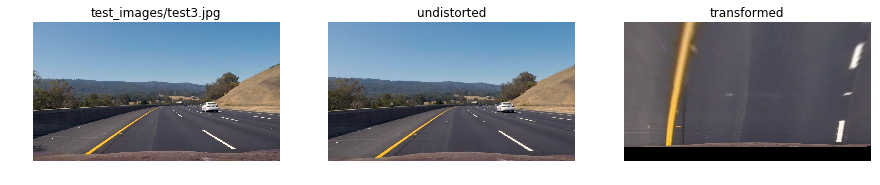

In [33]:
cam_params = pickle.load(open('camera_cal/camera_params.p', 'rb'))
cmtx = cam_params['cmtx']
dCoefs = cam_params['dCoefs']
for fname in glob.glob('test_images/*.jpg'):
    plt.figure(figsize=(15,30))
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title(fname)
    plt.axis('off')

    undistorted = cv2.undistort(img, cmtx, dCoefs, None, cmtx)
    plt.subplot(1, 3, 2)
    plt.imshow(undistorted)
    plt.title('undistorted')
    plt.axis('off')

    x,y = undistorted.shape[:2][::-1]
    src_transform_pts = np.float32([[281, 666], [1025, 666], [527, 500], [761, 500]])
    dst_transform_pts = np.float32([[200, y-100], [x-200, y-100], [200, 300], [x-200, 300]])
    m = cv2.getPerspectiveTransform(src_transform_pts, dst_transform_pts)
    transformed = cv2.warpPerspective(undistorted, m, (x, y))
    plt.subplot(1, 3, 3)
    plt.imshow(transformed)
    plt.title('transformed')
    plt.axis('off')
    plt.show()

In [6]:
cv2.drawMarker?